<h1 style="text-align: center;" markdown="3">Results</h1> 

# Introduction

Now that we have implemented all our models, we can bring the results together for a comparative assesment. As we compare the performance of these classifiers, there are a few things to keep in mind:

- Each algorithm has specific benefits and drawbacks. Though we are making a quantitative assessment based on several metrics, there are tradeoffs that should be considered, such as which metric we are most concerned with in a particular scenario, computational efficiency and the ability to rank and select features.
- Though we did some feature tuning and model augmentation techniques, I did not seek to find the optimum implementation of each model. It is very likely that with more detailed development and feature engineering, certain algorithms could reach a higher level of performance.

# Data Setup

All of our model results are stored in the `model`directory. Let's import them here to compare the results.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Import model results
baseline = pd.read_pickle("models/baseline.pkl")
lr = pd.read_pickle("models/lr.pkl")
nb = pd.read_pickle("models/nb.pkl")
svm = pd.read_pickle("models/svm.pkl")
rf = pd.read_pickle("models/rm.pkl")
dl = pd.read_pickle("models/dl.pkl")

# Concatenate the models
models = pd.concat([baseline, lr, nb, svm, rf, dl], axis=1).T

print("Model Scores")
models

Model Scores


,accuracy,recall,precision,f1,roc_auc,cross_entropy,cohen_kappa
baseline,0.840934,0.000000,0.000000,0.000000,0.500000,0.693147,0.000000
lr_sample,0.902705,0.475401,0.740278,0.578983,0.880678,0.736693,0.542994
lr_classwts,0.857329,0.741496,0.495377,0.593950,0.880678,0.736693,0.535996
lr_oversample,0.853370,0.765444,0.526910,0.624164,0.883381,0.720068,0.536905
lr_undersample,0.850683,0.769305,0.520745,0.621079,0.883381,0.720068,0.532361
lr_cv,0.850683,0.769788,0.520731,0.621227,0.883381,0.720068,0.532515
l1_feats_under_cv,0.856211,0.753378,0.534040,0.625025,0.883381,0.720068,0.539248
nb_simple,0.850969,0.655249,0.478448,0.553062,0.849767,0.360047,0.491143
nb_undersample,0.812222,0.756274,0.446693,0.561649,0.859324,0.302656,0.452060
nb_oversample,0.852372,0.682915,0.527788,0.595413,0.859324,0.302656,0.506934


# Best Model in terms of Accuracy

,accuracy,recall,precision,f1,roc_auc,cross_entropy,cohen_kappa
rf_adaboost_cv,0.907265,0.552856,0.722974,0.626573,0.892110,0.462257,0.587709
rf_feat,0.905209,0.475046,0.761672,0.585144,0.892110,0.462257,0.558288
lr_sample,0.902705,0.475401,0.740278,0.578983,0.880678,0.736693,0.542994
rf_oversample,0.901272,0.561400,0.681001,0.615444,0.892110,0.462257,0.578324
rf_simple,0.899634,0.443634,0.738793,0.554374,0.892110,0.462257,0.512128
svc_simple,0.890143,0.462838,0.750979,0.572708,0.887188,0.289161,0.513719
rf_over_cv,0.888249,0.597035,0.604169,0.600581,0.892110,0.462257,0.561615
rf_classwts,0.885626,0.694382,0.577918,0.630819,0.892110,0.462257,0.575894
svc_oversample,0.885559,0.698650,0.577141,0.632109,0.880102,0.273890,0.582623
nb_cv_platt,0.877246,0.603764,0.616560,0.610095,0.859324,0.302656,0.537261


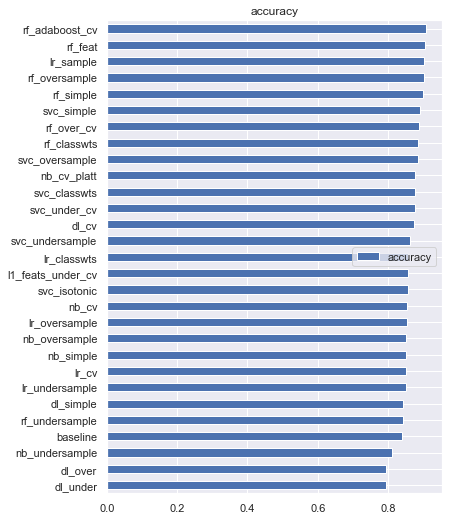

In [2]:
# Create a visualization function
def display_results(results, metric):
    if len(results > 10):
        fig, ax = plt.subplots(figsize=(6,len(results)*0.3))
    else:
        fig, ax = plt.subplots()
    (results.sort_values(metric, ascending=True)[[metric]].plot.barh(title=metric, ax=ax))
plt.show()

# Create graph
display_results(models, 'accuracy')

# Create results DataFrame
models.sort_values('accuracy', ascending=False)

Almost all models "learn" from the data and gives better accuracy than the baseline. Only the naive bayes with undersampling and the over and undersampling of deep learning models give poorer performance than the baseline. The Random Forest with boosting model gives the best results in terms of accuracy. In fact, the Random Forest algorithms do a pretty good job in terms of accuracy. But as we saw with the baseline model, this metric alone does not garanty a good performance. We see for example that to have a good recall, Random Forests are not the best algorithms to look for.

We may be more interested in a model that gives us a higher level of recall so we are correctly classifying 'sick' individuals as much as possible. Let's see what we have.

# Best Model in terms of Recall

,accuracy,recall,precision,f1,roc_auc,cross_entropy,cohen_kappa
dl_over,0.795630,0.844084,0.394349,0.537556,0.886711,0.329534,0.457863
dl_under,0.794969,0.841109,0.393189,0.535875,0.886711,0.329534,0.462709
svc_isotonic,0.855802,0.816505,0.492552,0.614444,0.880102,0.273890,0.553202
lr_cv,0.850683,0.769788,0.520731,0.621227,0.883381,0.720068,0.532515
lr_undersample,0.850683,0.769305,0.520745,0.621079,0.883381,0.720068,0.532361
lr_oversample,0.853370,0.765444,0.526910,0.624164,0.883381,0.720068,0.536905
rf_undersample,0.843392,0.756597,0.465290,0.576219,0.892110,0.462257,0.511201
nb_undersample,0.812222,0.756274,0.446693,0.561649,0.859324,0.302656,0.452060
dl_cv,0.874002,0.754648,0.537247,0.627656,0.886711,0.329534,0.566884
svc_under_cv,0.875962,0.753879,0.542676,0.631075,0.880102,0.273890,0.578240


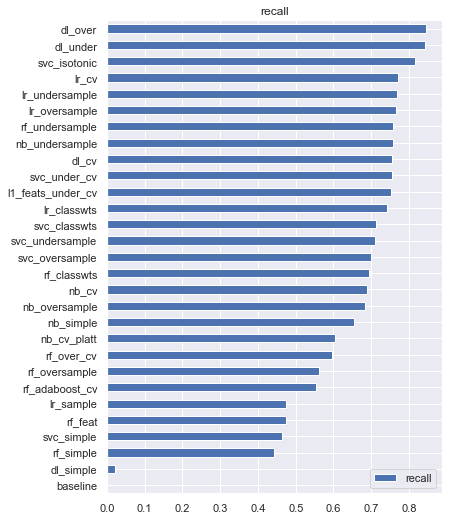

In [3]:
# Create graph
display_results(models, 'recall')

# Create results DataFrame
models.sort_values('recall', ascending=False)

In this case, deep learning models have good recalls to the detriment of accuracy. The few viable options (better than baseline in accuracy) is the isotonic support vector classifier or the cross-validated deep-learning model. Logistic regressions and deep learning models outperforms the others, as seen in the chart. As we also noticed during our machine learning process, the undersampling method helps increasing the recall. We see that recall is somewhat inversely proportional to the precision metric. Having a high recall often leads to predict more sick individuals as the reality. While it is a good idea to not miss someone who is sick, it could be counter-productive to have too many healthy people sent to the hospital. One thing we could do is either looking to the f1 value which is a function of both the recall and precision metrics.

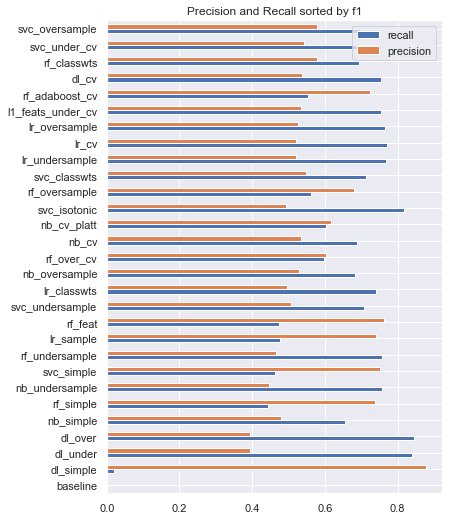

In [4]:
# Create a visualization function
def display_f1(results):
    if len(results > 10):
        fig, ax = plt.subplots(figsize=(6,len(results)*0.3))
    else:
        fig, ax = plt.subplots()
    (results.sort_values('f1', ascending=True)[['recall', 'precision']].plot.barh(title='Precision and Recall sorted by f1', ax=ax))
plt.show()


display_f1(models)

Here, the support vector machine with oversampling and the cross-validated undersampling models seem to be the best ones. Again, as mentioned during the machine learning process, oversampling seem to give a better overall performance than undersampling in terms of f1. But I also want to take into account the other metrics and make the best overall. In this case, I will take the mean of all metrics for each model. As cross-entropy, unlike any other metrics, is better, the lower the value, I will calculate (1 -  cross-entropy) for the mean.

# Best Model Overall (mean of all metrics)

In [5]:
# Inverse the cross entropy values
model_eval = models.T.copy()
model_eval[model_eval.index == 'cross_entropy'] = 1 - model_eval[model_eval.index == 'cross_entropy']

models['mean'] = model_eval.mean()

,accuracy,recall,precision,f1,roc_auc,cross_entropy,cohen_kappa,mean
svc_under_cv,0.875962,0.753879,0.542676,0.631075,0.880102,0.273890,0.578240,0.712578
svc_oversample,0.885559,0.698650,0.577141,0.632109,0.880102,0.273890,0.582623,0.711756
svc_isotonic,0.855802,0.816505,0.492552,0.614444,0.880102,0.273890,0.553202,0.705531
svc_classwts,0.877016,0.712507,0.548523,0.619853,0.880102,0.273890,0.571901,0.705144
dl_cv,0.874002,0.754648,0.537247,0.627656,0.886711,0.329534,0.566884,0.702516
rf_adaboost_cv,0.907265,0.552856,0.722974,0.626573,0.892110,0.462257,0.587709,0.689604
svc_undersample,0.862413,0.709103,0.507984,0.591926,0.880102,0.273890,0.539846,0.688212
nb_cv_platt,0.877246,0.603764,0.616560,0.610095,0.859324,0.302656,0.537261,0.685942
rf_classwts,0.885626,0.694382,0.577918,0.630819,0.892110,0.462257,0.575894,0.684927
svc_simple,0.890143,0.462838,0.750979,0.572708,0.887188,0.289161,0.513719,0.684059


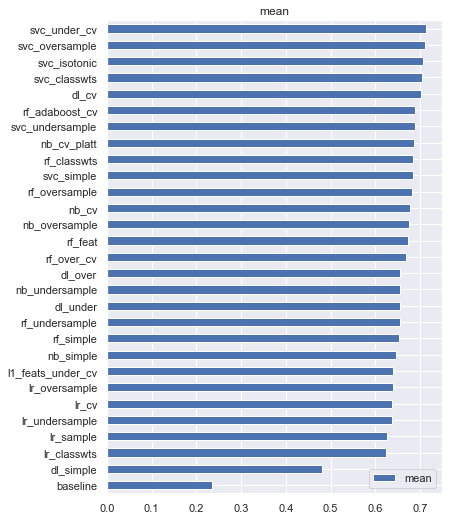

In [6]:
display_results(models, 'mean')
models.sort_values('mean', ascending=False)

When we take the mean of all metrics, support vector machines clearly overperform other machine learning models.This is in line with the [flowchart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) of sklearn. They recommend support vector machines for classification problems with <100K samples.

My final findings is that there is no such thing as a free meal. If we want to have the best overall algorithm, I would use the support vector machines with oversampling method if the data is unbalanced. This gives an accuracy of 88% and the best mean. The only downside is the poor recall (although not so bad either). So, many sick people will not get found. If we prefer recall over precision, but don't want to get overcrowded by "false" sick people such as in Hospitals, I would recommend using the Random Forest with class weightings. Finally, If we really want to find the people that are sick, like for example during the covid pandemic where being sick is not that dangerous (in comparison with a heart attack for example), but is highly contagious, I would recommend using logistic regressions or deep learning models which gives best recall results. 

That's it! I hope you enjoyed reading this project as much as I enjoyed doing it.